<a href="https://colab.research.google.com/github/Pugianf/Big_Data_and_Public_Sector_I/blob/main/Trabalho_Final_Big_Data_e_Setor_P%C3%BAblico_I_Popula%C3%A7%C3%A3o%2C_Demografia_e_Mercado_de_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando as bibliotecas necessárias

!pip install linearmodels

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from linearmodels import PooledOLS, PanelOLS, RandomEffects
from linearmodels.panel import compare
import matplotlib.pyplot as plt
%matplotlib inline 

     |████████████████████████████████| 1.5 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 21.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# conectando ao google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# lendo o arquivo

suicidio_estados = pd.read_excel('/content/drive/MyDrive/IDP/Dataset/suicidios_estados.xlsx')

suicidio_estados.head(12)

,Código_UF,Nome_UF,Cód_Região,Ano,Num_Suicidios,Populacao,Taxa_Suicidios_100mil_habitantes,Indice_Infraestrutura_Urbana_IVS,Indice_Educacao_IDH,Taxa_Analfabetismo,Índ_Gini,Renda_Media,Num_Divorcios,Taxa_Divorcios_100mil_habitantes,Populacao_Maior18,Taxa_Desocupacao
0,11,Rondônia,2,2010,82,1562409,5.248306,0.231,0.577,0.0942,0.56,1203.77,3015,289.928657,1039911,0.407940
1,11,Rondônia,2,2011,78,1690710,4.613446,0.132,0.609,0.1066,0.50,1079.84,4199,371.155089,1131333,0.398602
2,11,Rondônia,2,2012,73,1712488,4.262804,0.090,0.632,0.0926,0.48,1069.65,3894,334.144812,1165363,0.355715
3,11,Rondônia,2,2013,86,1733265,4.961734,0.125,0.628,0.0924,0.47,1111.46,3369,280.484475,1201136,0.355271
4,11,Rondônia,2,2014,84,1753407,4.790673,0.042,0.667,0.0888,0.47,1136.90,3631,297.580753,1220173,0.336144
5,11,Rondônia,2,2015,109,1772941,6.147977,0.062,0.653,0.0865,0.47,1153.51,3265,263.219844,1240408,0.314526
6,12,Acre,2,2010,41,733559,5.589189,0.361,0.559,0.1779,0.63,1081.76,619,141.291620,438101,0.193043
7,12,Acre,2,2011,41,751766,5.453825,0.267,0.612,0.1594,0.55,937.11,1398,307.498746,454636,0.186769
8,12,Acre,2,2012,43,765873,5.614508,0.280,0.621,0.1462,0.55,949.61,1360,288.406280,471557,0.160102
9,12,Acre,2,2013,44,779572,5.644123,0.141,0.624,0.1606,0.52,970.83,1054,219.848526,479421,0.171439


In [4]:
# vendo  o tamanho da base

print(f"Linhas: {suicidio_estados.shape[0]}; Colunas: {suicidio_estados.shape[1]}")

Linhas: 162; Colunas: 16


In [5]:
# verificando os anos que constam no DataFrame

suicidio_estados.Ano.unique()

array([2010, 2011, 2012, 2013, 2014, 2015])

In [6]:
# verificando a presença de valores nulos no DataFrame

suicidio_estados.isnull().values.any()

False

In [7]:
# analisando a base

suicidio_estados.describe()

,Código_UF,Cód_Região,Ano,Num_Suicidios,Populacao,Taxa_Suicidios_100mil_habitantes,Indice_Infraestrutura_Urbana_IVS,Indice_Educacao_IDH,Taxa_Analfabetismo,Índ_Gini,Renda_Media,Num_Divorcios,Taxa_Divorcios_100mil_habitantes,Populacao_Maior18,Taxa_Desocupacao
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000
mean,29.111111,2.814815,2012.500000,382.623457,7.393753e+06,5.421299,0.237488,0.660302,0.115632,0.520309,1134.130741,9190.950617,175.503406,5.336551e+06,0.319348
std,12.820791,1.252189,1.713121,456.184119,8.669442e+06,1.847509,0.100142,0.063854,0.063521,0.047174,374.453248,14400.120203,67.513965,6.521910e+06,0.146167
min,11.000000,1.000000,2010.000000,15.000000,4.504790e+05,2.479867,0.042000,0.520000,0.028900,0.420000,582.450000,299.000000,63.835011,2.714160e+05,0.121674
25%,17.000000,2.000000,2011.000000,125.000000,2.603364e+06,4.202466,0.160750,0.613000,0.066950,0.490000,846.725000,3038.750000,125.629462,1.882850e+06,0.194308
50%,27.000000,3.000000,2012.500000,209.000000,3.853334e+06,5.242112,0.217000,0.655500,0.090800,0.520000,1114.140000,5301.000000,163.062239,2.734735e+06,0.248511
75%,41.000000,4.000000,2014.000000,485.250000,9.039064e+06,6.382582,0.307500,0.697750,0.172150,0.540000,1319.177500,9755.500000,203.486164,6.391153e+06,0.447707
max,53.000000,5.000000,2015.000000,2300.000000,4.449976e+07,10.596579,0.526000,0.810000,0.260900,0.650000,2581.690000,86058.000000,371.155089,3.406099e+07,0.677868


In [8]:
# ao se agrupar o df pelos nomes das UFs e pelos anos, é possível verificar que as variáveis Código_UF e Cód_Região são constantes no tempo

suicidio_estados.groupby(['Nome_UF', 'Ano']).first()

Código_UF  Cód_Região  ...  Populacao_Maior18  Taxa_Desocupacao
Nome_UF   Ano                          ...                                     
Acre      2010         12           2  ...             438101          0.193043
          2011         12           2  ...             454636          0.186769
          2012         12           2  ...             471557          0.160102
          2013         12           2  ...             479421          0.171439
          2014         12           2  ...             486495          0.163026
...                   ...         ...  ...                ...               ...
Tocantins 2011         17           2  ...             959507          0.198621
          2012         17           2  ...             975355          0.189121
          2013         17           2  ...             988292          0.190130
          2014         17           2  ...            1030906          0.217784
          2015         17           2  ...            1065513          0.215817

[162 rows x 14 columns]

In [9]:
# verificando a maior e menor renda média por UF, considerando todos os anos

# Maior renda media: Distrito Federal
# Menor renda media: Maranhão

suicidio_estados.groupby(by='Nome_UF').mean()['Renda_Media'].sort_values(ascending=False).reset_index()

,Nome_UF,Renda_Media
0,Distrito Federal,2466.741667
1,São Paulo,1571.781667
2,Rio de Janeiro,1482.140000
3,Santa Catarina,1435.761667
4,Mato Grosso do Sul,1399.443333
5,Paraná,1391.240000
6,Mato Grosso,1359.230000
7,Rio Grande do Sul,1285.716667
8,Goiás,1267.768333
9,Espírito Santo,1224.313333


In [10]:
# substituindo os valores em Cod_Região pelos nomes da Regiões usando replace()

dicionario_regiões = {1: 'Centro-Oeste', 2: 'Norte', 3: 'Nordeste', 4: 'Sul', 5: 'Sudeste'}

suicidio_estados['Cód_Região'].replace(dicionario_regiões, inplace=True)

In [11]:
# número de estados em cada região

for região in dicionario_regiões.values():
  
  numero_estados = len(suicidio_estados[suicidio_estados['Cód_Região'] == região]['Nome_UF'].unique())
  print(f'{região} = {numero_estados} estados')

Centro-Oeste = 4 estados
Norte = 8 estados
Nordeste = 8 estados
Sul = 3 estados
Sudeste = 4 estados


In [12]:
# Criando DataFrame com média de Taxas de Suicídio por 100 mil habitantes, por região

media_suicidios_regiao = suicidio_estados[suicidio_estados['Ano'] == 2015].groupby('Cód_Região').sum()['Taxa_Suicidios_100mil_habitantes'].sort_values(ascending=False).reset_index()

media_suicidios_regiao['num_estados'] = media_suicidios_regiao['Cód_Região'].apply(lambda x: len(suicidio_estados[suicidio_estados['Cód_Região'] == x]['Nome_UF'].unique()))

media_suicidios_regiao['Taxa_Suicidios_100mil_habitantes_media'] = media_suicidios_regiao['Taxa_Suicidios_100mil_habitantes'] / media_suicidios_regiao['num_estados']

media_suicidios_regiao.sort_values('Taxa_Suicidios_100mil_habitantes_media', ascending=False)

# a região com maior taxa média de suicídios por 100 mil habitantes no ano de 2015 foi a região Sul

,Cód_Região,Taxa_Suicidios_100mil_habitantes,num_estados,Taxa_Suicidios_100mil_habitantes_media
2,Sul,25.843913,3,8.614638
0,Norte,48.549307,8,6.068663
3,Centro-Oeste,24.082543,4,6.020636
1,Nordeste,40.261822,8,5.032728
4,Sudeste,19.404599,4,4.851150


In [13]:
# Taxa média nacional de suicidios por 100 mil habitantes

media_nacional_suicidio = suicidio_estados.groupby('Ano').sum()['Taxa_Suicidios_100mil_habitantes'].div(27)

media_nacional_suicidio

Ano
2010    5.236076
2011    5.258146
2012    5.367977
2013    5.550665
2014    5.257813
2015    5.857118
Name: Taxa_Suicidios_100mil_habitantes, dtype: float64

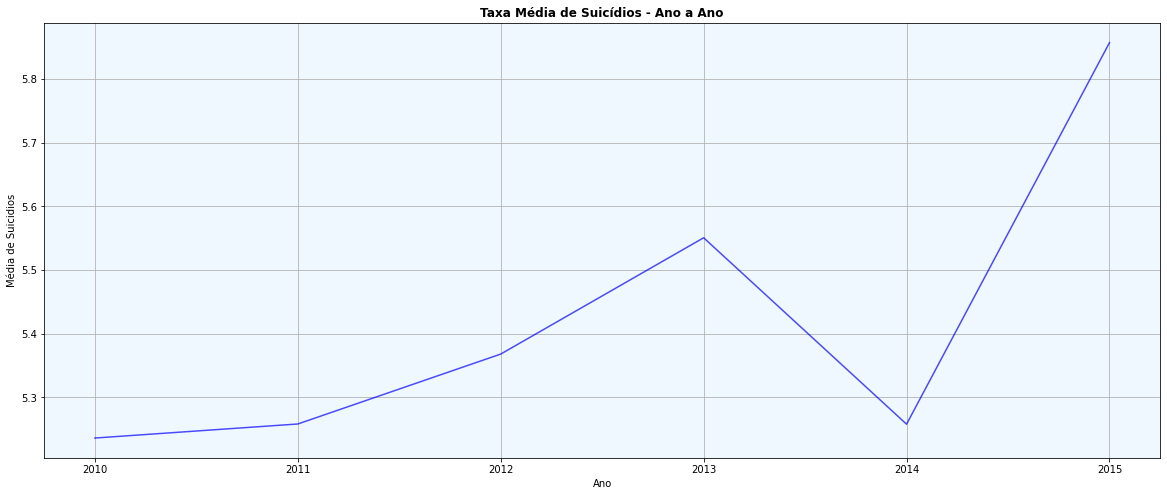

In [14]:
# conforme pode-se perceber no gráfico, há uma tendência de aumento na taxa média de suicídios
# ocorrendo interrupção do caminho ascendente apenas em 2014, para depois haver subida acentuada em 2015

fig, ax = plt.subplots(figsize=(20, 8))

ax.set_facecolor("AliceBlue")
plt.grid()

ax.plot(media_nacional_suicidio, color='blue', alpha=0.7)

plt.xlabel('Ano')
plt.ylabel('Média de Suicidios')
plt.title('Taxa Média de Suicídios - Ano a Ano', fontweight='bold')

plt.show()

In [15]:
# criando variável capaz de identificar se a região pertence ao norte, nordeste ou centro-oeste

suicidio_estados['N_NE_CO'] = [1 if ((x != 'Sul') & (x != 'Sudeste')) else 0 for x in suicidio_estados.Cód_Região]

In [16]:
# subamostra taxa de suicídio N-NE-CO
taxa_N_NE_CO = suicidio_estados['Taxa_Suicidios_100mil_habitantes'].loc[suicidio_estados['N_NE_CO'] == 1]

# subamostra taxa de suicídio S-SE
taxa_S_SE = suicidio_estados['Taxa_Suicidios_100mil_habitantes'].loc[suicidio_estados['N_NE_CO'] == 0]

In [17]:
# teste para saber se a taxa média de suicídios é estatisticamente diferente

stats.ttest_ind(taxa_S_SE, taxa_N_NE_CO, nan_policy='omit')

# pode-se verificar que a taxa média de suicídios é estatisticamente diferente e que o p valor é significativo, estando bem abaixo de 0.05

Ttest_indResult(statistic=2.8803477776641104, pvalue=0.004516993808422591)

In [18]:
# montando a estrutura do painel

suicidio_estados_painel = suicidio_estados.set_index(['Nome_UF', 'Ano'], drop=False)

suicidio_estados_painel

# São realizadas observações de 12 variáveis em 27 estados durante os 6 anos que compõem o painel

# o painel é completamente balanceado, pois ocorre o mesmo número de períodos para cada unidade de corte transversal

Código_UF           Nome_UF  ... Taxa_Desocupacao  N_NE_CO
Nome_UF          Ano                                ...                          
Rondônia         2010         11          Rondônia  ...         0.407940        1
                 2011         11          Rondônia  ...         0.398602        1
                 2012         11          Rondônia  ...         0.355715        1
                 2013         11          Rondônia  ...         0.355271        1
                 2014         11          Rondônia  ...         0.336144        1
...                          ...               ...  ...              ...      ...
Distrito Federal 2011         53  Distrito Federal  ...         0.467683        1
                 2012         53  Distrito Federal  ...         0.460008        1
                 2013         53  Distrito Federal  ...         0.468158        1
                 2014         53  Distrito Federal  ...         0.472302        1
                 2015         53  Distrito Federal  ...         0.389015        1

[162 rows x 17 columns]

In [19]:
suicidio_estados2 = suicidio_estados[['Num_Suicidios', 'Populacao', 'Taxa_Suicidios_100mil_habitantes', 'Indice_Infraestrutura_Urbana_IVS',
                                      'Indice_Educacao_IDH', 'Taxa_Analfabetismo', 'Índ_Gini', 'Renda_Media', 'Num_Divorcios',
                                      'Taxa_Divorcios_100mil_habitantes', 'Populacao_Maior18', 'Taxa_Desocupacao']]

In [20]:
from statsmodels.formula.api import ols

In [21]:
# criando um modelo simples de Mínimos Quadrados Ordinários

formula = 'Taxa_Suicidios_100mil_habitantes ~ 1 + Renda_Media + Taxa_Desocupacao'

modelo = PooledOLS.from_formula(formula=formula, data=suicidio_estados_painel)
modelo = modelo.fit()

print(modelo.summary)

# o modelo como um todo é significante, conforme visto por P-value = 0.0006, bem menor que 0.05

# a renda média não possui significância, porém a taxa de desocupação é significante

# dado que o p-valor da renda média não é significante, nada se pode afirmar sobre seu impacto quanto à taxa de suicídios

# as estimativas de MQO agrupado são provavelmente inconsistentes dado o pouco ajuste do modelo, conforme visto pelo valor de R-squared
# o que indica que existem outras variáveis que ajudam a explicar melhor a variável dependente

                                 PooledOLS Estimation Summary                                 
Dep. Variable:     Taxa_Suicidios_100mil_habitantes   R-squared:                        0.0888
Estimator:                                PooledOLS   R-squared (Between):              0.1109
No. Observations:                               162   R-squared (Within):              -0.0788
Date:                              Sun, Dec 05 2021   R-squared (Overall):              0.0888
Time:                                      22:42:17   Log-likelihood                   -321.28
Cov. Estimator:                          Unadjusted                                           
                                                      F-statistic:                      7.7476
Entities:                                        27   P-value                           0.0006
Avg Obs:                                     6.0000   Distribution:                   F(2,159)
Min Obs:                                     6.000

In [40]:
# modelo melhorado

formula = 'Taxa_Suicidios_100mil_habitantes ~ 1 + Renda_Media + Taxa_Desocupacao + C(Cód_Região) + Indice_Infraestrutura_Urbana_IVS + Indice_Educacao_IDH + Taxa_Analfabetismo + Índ_Gini + Renda_Media + Taxa_Divorcios_100mil_habitantes + Taxa_Desocupacao'

modelo_olsagrup = PooledOLS.from_formula(formula=formula, data=suicidio_estados_painel)
modelo_olsagrup = modelo_olsagrup.fit(cov_type="robust")

print(modelo_olsagrup.summary)

                                 PooledOLS Estimation Summary                                 
Dep. Variable:     Taxa_Suicidios_100mil_habitantes   R-squared:                        0.5314
Estimator:                                PooledOLS   R-squared (Between):              0.6083
No. Observations:                               162   R-squared (Within):              -0.0534
Date:                              Sun, Dec 05 2021   R-squared (Overall):              0.5314
Time:                                      23:00:40   Log-likelihood                   -267.41
Cov. Estimator:                              Robust                                           
                                                      F-statistic:                      15.462
Entities:                                        27   P-value                           0.0000
Avg Obs:                                     6.0000   Distribution:                  F(11,150)
Min Obs:                                     6.000

In [43]:
# modelo de efeitos fixos

formula_ef = f"{formula} + EntityEffects"

# Criando o modelo

modelo_ef = PanelOLS.from_formula(formula=formula_ef, data=suicidio_estados_painel, drop_absorbed=True)
modelo_ef = modelo_ef.fit(cov_type='robust')

# Printando resultado
print(modelo_ef.summary)

# não é possível estimar o efeito de Cód_Região porque se tratam de variáveis que são constantes no tempo

                                 PanelOLS Estimation Summary                                  
Dep. Variable:     Taxa_Suicidios_100mil_habitantes   R-squared:                        0.1727
Estimator:                                 PanelOLS   R-squared (Between):              0.1051
No. Observations:                               162   R-squared (Within):               0.1727
Date:                              Sun, Dec 05 2021   R-squared (Overall):              0.1130
Time:                                      23:05:43   Log-likelihood                   -139.15
Cov. Estimator:                              Robust                                           
                                                      F-statistic:                      3.8181
Entities:                                        27   P-value                           0.0008
Avg Obs:                                     6.0000   Distribution:                   F(7,128)
Min Obs:                                     6.000

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/model.py:1798: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

C(Cód_Região)[T.Nordeste], C(Cód_Região)[T.Norte], C(Cód_Região)[T.Sudeste], C(Cód_Região)[T.Sul]

  AbsorbingEffectWarning,


In [45]:
# modelo de efeitos aleatórios

formula_ea = 'Taxa_Suicidios_100mil_habitantes ~ 1 + Renda_Media + Taxa_Desocupacao + C(Cód_Região) + Indice_Infraestrutura_Urbana_IVS + Indice_Educacao_IDH + Taxa_Analfabetismo + Índ_Gini + Renda_Media + Taxa_Divorcios_100mil_habitantes + Taxa_Desocupacao'

# Criando o modelo
modelo_ea = RandomEffects.from_formula(formula=formula_ea, data=suicidio_estados_painel)
modelo_ea = modelo_ea.fit(cov_type='robust')

# Printando resultado
print(modelo_ea.summary)

                               RandomEffects Estimation Summary                               
Dep. Variable:     Taxa_Suicidios_100mil_habitantes   R-squared:                        0.2359
Estimator:                            RandomEffects   R-squared (Between):              0.4900
No. Observations:                               162   R-squared (Within):               0.1643
Date:                              Sun, Dec 05 2021   R-squared (Overall):              0.4521
Time:                                      23:11:46   Log-likelihood                   -152.83
Cov. Estimator:                              Robust                                           
                                                      F-statistic:                      4.2100
Entities:                                        27   P-value                           0.0000
Avg Obs:                                     6.0000   Distribution:                  F(11,150)
Min Obs:                                     6.000